<a href="https://colab.research.google.com/github/smannan/LIFXBulbAnalysis/blob/main/SmartBulbARIMAModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

In [4]:
filename = '/content/drive/Shared drives/CMPE295B/JoinedPGEBulbData/2021-08-26_13_00_2021-09-25_00_00_hourly.csv'
bulb_data = pd.read_csv(filename, infer_datetime_format = True).drop(['Unnamed: 0'], axis=1, inplace=False)
bulb_data['timestamp'] = pd.to_datetime(bulb_data['timestamp'])

In [5]:
bulb_data.head()

,timestamp,brightness,kelvin,kWH,cost,usage,percent_usage_by_bulb,cost_per_bulb
0,2021-08-26 13:00:00,1.0,2700.0,0.119,0.09,0.35,34.000000,0.030600
1,2021-08-26 14:00:00,1.0,2700.0,0.510,0.11,0.38,134.210526,0.147632
2,2021-08-26 15:00:00,1.0,2700.0,0.510,0.09,0.34,150.000000,0.135000
3,2021-08-26 16:00:00,1.0,2700.0,0.510,0.08,0.29,175.862069,0.140690
4,2021-08-26 17:00:00,1.0,2700.0,0.510,0.11,0.40,127.500000,0.140250


### Visualize time series data

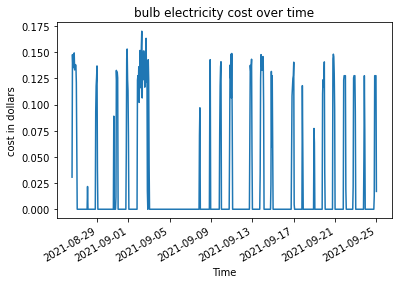

In [7]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.plot(bulb_data['timestamp'], bulb_data['cost_per_bulb'])
plt.gcf().autofmt_xdate()
plt.title('bulb electricity cost over time')
plt.ylabel('cost in dollars')
plt.xlabel('Time')
plt.show()

### View autocorrelation plot
- How correlated are current timesteps to previous ones

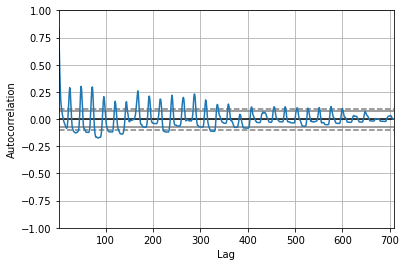

In [8]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(bulb_data[['kWH']])
plt.show()

- Looks like there is not a lot of correlation between timesteps?
- Confidence interval = 95% so focus on correlations within this interval as they are likely not statistical flukes


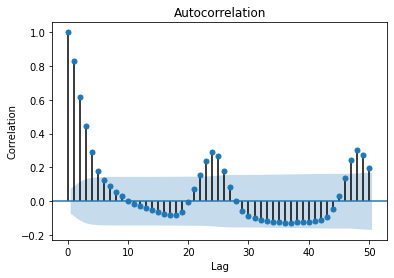

In [10]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(bulb_data[['kWH']], lags=50)
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.show()

### View partial autocorrelation
- Removes indirect relationships between lags

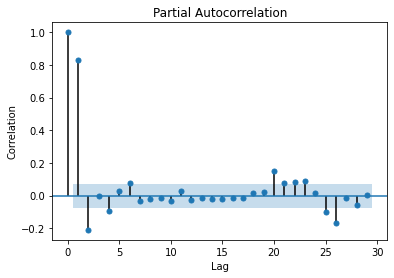

In [11]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(bulb_data[['kWH']])
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.show()

### Summary
- ACF correlation should be strong for the first k lags then taper off
- PACF should have *no* correlation after k
- The first 5 steps or so look like they are correlated but this tapers off afterwards?
- Want data to be stationary - remove any trends beforehand analysis?
- Data looks random right now, no autocorrelation. Might be because time period is too short. May try forecasting pricing data instead

- https://www.itl.nist.gov/div898/handbook/eda/section3/autocop1.htm